#### This demo is a brief overview of the documentation https://lets-plot.org/pages/geocoding.html

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



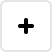
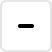
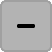
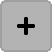
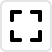
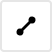
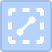

In [1]:
import shapely
from IPython.display import display, Markdown

from lets_plot import *
from lets_plot.geo_data import *

LetsPlot.setup_html()

In [2]:
def run_catching(f):
    def colored(s):
        return Markdown('<span style="color: #ff0000">{}</span>'.format(s))
    try:
        f()
        assert False, 'Error expected'
    except Exception as e:
        display(colored('{}'.format(e)))

### Basic usage

In [3]:
# Level autodetection
geocode(names=['florida', 'tx']).get_geocodes()

# Result may contain the following columns:
# id - for internal use. Only in geocodes DataFrame.
# request - column with lowest administrative level. The request belongs to this level. Can be a city/county/state/country.
# parents - if provided. Can be a county/state/country.
# found name - name that found by geocoding.
# geometry - only in geometry DataFrame.

# Thanks to request column it's obvious that level was detected as state.

id    state found name                               centroid  \
0  162050  florida    Florida   [-81.664617414276, 28.0571937561035]   
1  114690       tx      Texas  [-99.6829525269137, 31.1685702949762]   

                                            position  \
0  [-87.6348964869976, 25.1162923872471, -80.0309...   
1  [-106.645845472813, 25.8370596170425, -93.5078...   

                                               limit  
0  [-87.6348964869976, 24.5230695605278, -80.0309...  
1  [-106.645845472813, 25.8370596170425, -93.5078...

In [4]:
# Explicit level
geocode_states(['florida', 'tx']).get_geocodes()

id    state found name                               centroid  \
0  162050  florida    Florida   [-81.664617414276, 28.0571937561035]   
1  114690       tx      Texas  [-99.6829525269137, 31.1685702949762]   

                                            position  \
0  [-87.6348964869976, 25.1162923872471, -80.0309...   
1  [-106.645845472813, 25.8370596170425, -93.5078...   

                                               limit  
0  [-87.6348964869976, 24.5230695605278, -80.0309...  
1  [-106.645845472813, 25.8370596170425, -93.5078...

In [5]:
# Parameters can be change between searches
florida = geocode_states('florida')

display(florida.countries('usa').get_geocodes())
display(florida.countries('uruguay').get_geocodes())
display(florida.countries(None).get_geocodes())

id    state found name country                              centroid  \
0  162050  florida    Florida     usa  [-81.664617414276, 28.0571937561035]   

                                            position  \
0  [-87.6348964869976, 25.1162923872471, -80.0309...   

                                               limit  
0  [-87.6348964869976, 24.5230695605278, -80.0309...

id    state found name  country  \
0  1635164  florida    Florida  uruguay   

                                 centroid  \
0  [-55.8642029687055, -33.7640165537596]   

                                            position  \
0  [-56.5363445878029, -34.4264329969883, -55.098...   

                                               limit  
0  [-56.5363445878029, -34.4264329969883, -55.098...

id    state found name                              centroid  \
0  162050  florida    Florida  [-81.664617414276, 28.0571937561035]   

                                            position  \
0  [-87.6348964869976, 25.1162923872471, -80.0309...   

                                               limit  
0  [-87.6348964869976, 24.5230695605278, -80.0309...

### Scope

In [6]:
# str scope uses level autodetection.
# NB: Florida in USA is the most relevant result.
#     We can't find Florida in Uruguay using only the name - parent (country or scope) is required.
geocode_states('florida').scope('uruguay').get_geocodes()

id    state found name                                centroid  \
0  1635164  florida    Florida  [-55.8642029687055, -33.7640165537596]   

                                            position  \
0  [-56.5363445878029, -34.4264329969883, -55.098...   

                                               limit  
0  [-56.5363445878029, -34.4264329969883, -55.098...

In [7]:
# Geocoder scope
uruguay = geocode_countries('uruguay')
geocode_states('florida').scope(uruguay).get_geocodes()

id    state found name                                centroid  \
0  1635164  florida    Florida  [-55.8642029687055, -33.7640165537596]   

                                            position  \
0  [-56.5363445878029, -34.4264329969883, -55.098...   

                                               limit  
0  [-56.5363445878029, -34.4264329969883, -55.098...

In [8]:
# Scope is a singleton. Collections are not allowed.
scope = ['uruguay']
run_catching(
    lambda: geocode_states('florida').scope(scope).get_geocodes()
)

<span style="color: #ff0000">Unsupported 'scope' type. Expected 'str' or 'Geocoder' but was 'list'</span>

In [9]:
# Geocoder with more than one entry is not allowed too.
scope = geocode_countries(['uruguay', 'usa'])
run_catching(
    lambda: geocode_states('florida').scope(scope).get_geocodes()
)

<span style="color: #ff0000">'scope' has 2 entries, but expected to have exactly 1</span>

In [10]:
# str scope can be ambiguous.
run_catching(
    lambda: geocode_cities('worcester').scope('worcester county').get_geocodes()
)

# Let's geocode Worcester County in a way how the service does - using level detection without parents.
# In fact Worcester County was found, but error message in case of parent ambiguity is not clear. We will improve it.
run_catching(
    lambda: geocode_counties('worcester county').get_geocodes()
)

<span style="color: #ff0000">Region is not found: worcester county</span>

<span style="color: #ff0000">Multiple objects (2) were found for worcester county:
- Worcester County (United States, Maryland)
- Worcester County (United States, Massachusetts)
</span>

### Parents.

In [11]:
# Parents should have same length as names
geocode_cities(['warwick', 'worcester'])\
    .counties(['Worth County', 'worcester county'])\
    .states(['georgia', 'massachusetts'])\
    .get_geocodes()

id       city found name            county          state  \
0     119776    warwick    Warwick      Worth County        georgia   
1  158851900  worcester  Worcester  worcester county  massachusetts   

                                centroid  \
0  [-83.9205776783726, 31.8303624540567]   
1  [-71.8154652712922, 42.2678737342358]   

                                            position  \
0  [-83.9291015267372, 31.8222776055336, -83.9120...   
1  [-71.8840424716473, 42.2100399434566, -71.7312...   

                                               limit  
0  [-83.9291015267372, 31.8222776055336, -83.9120...  
1  [-71.8840424716473, 42.2100399434566, -71.7312...

In [12]:
# Parents can contain None items (e.g., countries with different administrative divisions).
geocode_cities(['warwick', 'worcester'])\
    .states(['Georgia', None])\
    .countries(['USA', 'United Kingdom'])\
    .get_geocodes()

id       city found name    state         country  \
0    119776    warwick    Warwick  Georgia             USA   
1  20971097  worcester  Worcester     None  United Kingdom   

                                centroid  \
0  [-83.9205776783726, 31.8303624540567]   
1   [-2.2095610731112, 52.1965283900499]   

                                            position  \
0  [-83.9291015267372, 31.8222776055336, -83.9120...   
1  [-2.2632023692131, 52.1616362035275, -2.157303...   

                                               limit  
0  [-83.9291015267372, 31.8222776055336, -83.9120...  
1  [-2.2632023692131, 52.1616362035275, -2.157303...

In [13]:
# Geocoder object can be used as parent. Number of entries should be same as the number of names.
s = geocode_states(['vermont', 'georgia']).scope('usa')
display(s.get_geocodes())

# NB: Parent request will be present in result as a column.
display(geocode_cities(['worcester', 'warwick']).states(s).get_geocodes())

id    state found name                               centroid  \
0   60759  vermont    Vermont   [-72.772353529363, 43.8718488067389]   
1  161957  georgia    Georgia  [-83.2514879869572, 32.6792977005243]   

                                            position  \
0  [-73.4377402067184, 42.7269606292248, -71.4653...   
1  [-85.6052421033382, 30.3557570278645, -80.8400...   

                                               limit  
0  [-73.4377402067184, 42.7269606292248, -71.4653...  
1  [-85.6052421033382, 30.3557570278645, -80.8400...

id       city found name    state  \
0  8898137  worcester  Worcester  vermont   
1   119776    warwick    Warwick  georgia   

                                centroid  \
0  [-72.5724501055639, 44.4132962822914]   
1  [-83.9205776783726, 31.8303624540567]   

                                            position  \
0  [-72.6543393731117, 44.3454243242741, -72.4935...   
1  [-83.9291015267372, 31.8222776055336, -83.9120...   

                                               limit  
0  [-72.6543393731117, 44.3454243242741, -72.4935...  
1  [-83.9291015267372, 31.8222776055336, -83.9120...

In [14]:
# counties and states can be combined with scope. scope acts as a top level parent.
geocode_counties(['Dakota County', 'Nevada County']).states(['NE', 'AR']).scope('USA').get_geocodes()

id         county     found name state  \
0  1425447  Dakota County  Dakota County    NE   
1  1826825  Nevada County  Nevada County    AR   

                                centroid  \
0  [-96.5715826334556, 42.4019493162632]   
1  [-93.2913903139467, 33.6979349702597]   

                                            position  \
0  [-96.7274482548237, 42.2765184938908, -96.3566...   
1  [-93.4838207066059, 33.4403765201569, -93.1042...   

                                               limit  
0  [-96.7274482548237, 42.2765184938908, -96.3566...  
1  [-93.4838207066059, 33.4403765201569, -93.1042...

In [15]:
# scope can't be combined with countries - geocoding won't try to guess what level is it
run_catching(
    lambda: geocode_counties('Nevada County').countries('usa').scope('Arizona').get_geocodes()
)

<span style="color: #ff0000">Invalid request: countries and scope can't be used simultaneously</span>

In [16]:
# Parents and names should have same length
run_catching(
    lambda: geocode_states(['florida', 'rivera']).countries('uruguay').get_geocodes()
)

<span style="color: #ff0000">Invalid request: countries count(1) != names count(2)</span>

In [17]:
# Same for Geocoder
countries = geocode_countries('uruguay')
run_catching(
    lambda: geocode_states(['florida', 'rivera']).countries(countries).get_geocodes()
)

<span style="color: #ff0000">Invalid request: countries count(1) != names count(2)</span>

### Ignoring an ambiguity

In [18]:
# Ambiguous result generates an error:
run_catching(
    lambda: geocode_cities(['warwick', 'worcester']).get_geocodes()
)

<span style="color: #ff0000">Multiple objects (15) were found for warwick:
- Warwick (United States, Georgia, Worth County)
- Warwick (United States, New York, Orange County)
- Warwick (United Kingdom, England, West Midlands, Warwickshire)
- Warwick (United States, North Dakota, Benson County)
- Warwick (United States, Oklahoma, Lincoln County)
- Warwick (Canada, Ontario, Southwestern Ontario, Lambton County)
- Warwick (United States, Massachusetts, Franklin County)
- Warwick (United States, Rhode Island, Kent County)
- Warwick (Canada, Arthabaska, Québec, Centre-du-Québec)
- Warwick (Australia, Queensland)
Multiple objects (5) were found for worcester:
- Worcester (United States, Vermont, Washington County)
- Worcester (United Kingdom, England, West Midlands, Worcestershire)
- Worcester (South Africa, Western Cape, Cape Winelands District Municipality)
- Worcester (United States, Massachusetts, Worcester County)
- Worcester Township (United States, Pennsylvania, Montgomery County)
</span>

In [19]:
# Ambiguous result can be converted to a matching result (e.g., for drawing on a map)
geocode_cities(['warwick', 'worcester']).allow_ambiguous().get_geocodes()

id       city                   found name  \
0       119776    warwick                      Warwick   
1       176086    warwick                      Warwick   
2       176448    warwick                      Warwick   
3       181594    warwick                      Warwick   
4       184249    warwick                      Warwick   
5      4072420    warwick                      Warwick   
6    158818247    warwick                      Warwick   
7    158863860    warwick                      Warwick   
8    159726256    warwick                      Warwick   
9   1817489924    warwick                      Warwick   
10     3049373    warwick             Warwick Township   
11     3521480    warwick             Warwick Township   
12     9244563    warwick             Warwick Mountain   
13   158903676    warwick                 West Warwick   
14     7997266    warwick  Sainte-Élizabeth-de-Warwick   
15     8898137  worcester                    Worcester   
16    20971097  worcester                    Worcester   
17    30670038  worcester                    Worcester   
18   158851900  worcester                    Worcester   
19     3076291  worcester           Worcester Township   

                                 centroid  \
0   [-83.9205776783726, 31.8303624540567]   
1   [-74.3590787617065, 41.2538411468267]   
2   [-1.58227695103754, 52.3015402257442]   
3   [-98.7057320814883, 47.8541030734777]   
4   [-96.9995924696813, 35.6883452832699]   
5   [-81.8960721893947, 43.0157359689474]   
6    [-72.3365538645007, 42.667919844389]   
7    [-71.4332938210472, 41.715542525053]   
8    [-72.0051031618881, 45.952380001545]   
9   [152.032703831792, -28.2163204997778]   
10   [-75.757813608352, 40.1801763474941]   
11  [-75.0764330968138, 40.2491855621338]   
12  [-63.3714760496144, 45.5978938937187]   
13  [-71.5257788638961, 41.6969098895788]   
14  [-72.1010115992802, 45.9195195883512]   
15  [-72.5724501055639, 44.4132962822914]   
16   [-2.2095610731112, 52.1965283900499]   
17  [19.4459268450737, -33.6462374031544]   
18  [-71.8154652712922, 42.2678737342358]   
19  [-75.3438698875367, 40.1926231384277]   

                                             position  \
0   [-83.9291015267372, 31.8222776055336, -83.9120...   
1   [-74.374563395977, 41.2334154546261, -74.33202...   
2   [-1.78017809987068, 52.2137045860291, -1.40608...   
3   [-98.7164886295795, 47.8475135564804, -98.6948...   
4   [-97.0261216163635, 35.6740544736385, -96.9776...   
5   [-82.0060113072395, 42.9303230345249, -81.7887...   
6   [-72.4120393395424, 42.6094262301922, -72.2719...   
7   [-71.5189133584499, 41.6628210246563, -71.3564...   
8   [-72.0792764425278, 45.8764761686325, -71.9089...   
9   [152.023720443249, -28.224236369133, 152.04168...   
10  [-75.8212745189667, 40.1465494930744, -75.6930...   
11  [-75.1225188374519, 40.2152167260647, -75.0345...   
12  [-63.4091444313526, 45.5644172430038, -63.3474...   
13  [-71.5342850983143, 41.6620793938637, -71.4839...   
14  [-72.1493585407734, 45.8681344985962, -72.0435...   
15  [-72.6543393731117, 44.3454243242741, -72.4935...   
16  [-2.2632023692131, 52.1616362035275, -2.157303...   
17  [19.4369441270828, -33.6537154018879, 19.45490...   
18  [-71.8840424716473, 42.2100399434566, -71.7312...   
19  [-75.4107637703419, 40.1558580994606, -75.2932...   

                                                limit  
0   [-83.9291015267372, 31.8222776055336, -83.9120...  
1   [-74.374563395977, 41.2334154546261, -74.33202...  
2   [-1.78017809987068, 52.2137045860291, -1.40608...  
3   [-98.7164886295795, 47.8475135564804, -98.6948...  
4   [-97.0261216163635, 35.6740544736385, -96.9776...  
5   [-82.0060113072395, 42.9303230345249, -81.7887...  
6   [-72.4120393395424, 42.6094262301922, -72.2719...  
7   [-71.5189133584499, 41.6293966770172, -71.3564...  
8   [-72.0792764425278, 45.8764761686325, -71.9089...  
9   [152.023720443249, -28.224236369133, 152.04168...  
10  [-75.8212745189667, 40.146549

In [20]:
# Missing name gives an error
run_catching(
    lambda: geocode_cities(names=['paris', 'worcester', 'foo']).get_geocodes()
)

# Missing parent also gives an error
run_catching(
    lambda: geocode_cities('paris').countries('foo').get_geocodes()
)

<span style="color: #ff0000">No objects were found for foo.
</span>

<span style="color: #ff0000">Region is not found: foo</span>

In [21]:
# ignore_not_found() - ingore unknown names, keep everything else, including ambiguous names
run_catching(
    lambda: geocode_cities(['paris', 'worcester', 'foo']).ignore_not_found().get_geocodes()
)

# Missing parent also gives an error
run_catching(
    lambda: geocode_cities(['paris', 'worcester']).countries(['foo', None]).ignore_not_found().get_geocodes()
)

<span style="color: #ff0000">Multiple objects (5) were found for worcester:
- Worcester (United States, Vermont, Washington County)
- Worcester (United Kingdom, England, West Midlands, Worcestershire)
- Worcester (South Africa, Western Cape, Cape Winelands District Municipality)
- Worcester (United States, Massachusetts, Worcester County)
- Worcester Township (United States, Pennsylvania, Montgomery County)
</span>

<span style="color: #ff0000">Multiple objects (5) were found for worcester:
- Worcester (United States, Vermont, Washington County)
- Worcester (United Kingdom, England, West Midlands, Worcestershire)
- Worcester (South Africa, Western Cape, Cape Winelands District Municipality)
- Worcester (United States, Massachusetts, Worcester County)
- Worcester Township (United States, Pennsylvania, Montgomery County)
</span>

In [22]:
# ignore_all_errors() - keep only exactly matched names
geocode_cities(['paris', 'worcester', 'foo']).ignore_all_errors().get_geocodes()

geocode_cities(['paris', 'worcester']).countries(['france', 'foo']).ignore_all_errors().get_geocodes()

id   city found name country                              centroid  \
0  17807753  paris      Paris  france  [2.32002815231681, 48.8587861508131]   

                                            position  \
0  [2.22412258386612, 48.8155750930309, 2.4697606...   

                                               limit  
0  [2.22412258386612, 48.8155750930309, 2.4697606...

In [23]:
# ignore_not_found() + allow_ambiguous() - see all ambiguous names without "not found" error
geocode_cities(['paris', 'worcester', 'foo']).ignore_not_found().allow_ambiguous().get_geocodes()

id       city          found name  \
0   17807753      paris               Paris   
1    8898137  worcester           Worcester   
2   20971097  worcester           Worcester   
3   30670038  worcester           Worcester   
4  158851900  worcester           Worcester   
5    3076291  worcester  Worcester Township   

                                centroid  \
0   [2.32002815231681, 48.8587861508131]   
1  [-72.5724501055639, 44.4132962822914]   
2   [-2.2095610731112, 52.1965283900499]   
3  [19.4459268450737, -33.6462374031544]   
4  [-71.8154652712922, 42.2678737342358]   
5  [-75.3438698875367, 40.1926231384277]   

                                            position  \
0  [2.22412258386612, 48.8155750930309, 2.4697606...   
1  [-72.6543393731117, 44.3454243242741, -72.4935...   
2  [-2.2632023692131, 52.1616362035275, -2.157303...   
3  [19.4369441270828, -33.6537154018879, 19.45490...   
4  [-71.8840424716473, 42.2100399434566, -71.7312...   
5  [-75.4107637703419, 40.1558580994606, -75.2932...   

                                               limit  
0  [2.22412258386612, 48.8155750930309, 2.4697606...  
1  [-72.6543393731117, 44.3454243242741, -72.4935...  
2  [-2.2632023692131, 52.1616362035275, -2.157303...  
3  [19.4369441270828, -33.6537154018879, 19.45490...  
4  [-71.8840424716473, 42.2100399434566, -71.7312...  
5  [-75.4107637703419, 40.1558580994606, -75.2932...

In [24]:
# List only 10 first distinct not found names
run_catching(
    lambda: geocode_cities(['foo', 'foo', 'foo', 'foo4', 'foo5', 'foo6', 'foo7', 'foo8', 'foo9', 'foo10', 'foo11', 'foo12', 'foo13', 'foo14', 'foo15']).get_geocodes()
)

<span style="color: #ff0000">No objects were found for foo, foo4, foo5, foo6, foo7, foo8, foo9, foo10, foo11, foo12 and (3) more.
</span>

In [25]:
# Empty DataFrame if no matching names left
geocode_cities('worcester').ignore_all_errors().get_geocodes()

Empty DataFrame
Columns: [id, city, found name, centroid, position, limit]
Index: []

### `where()` function

In [26]:
# Take object closest to a place.
boston = geocode_cities('boston')
geocode_cities('worcester').where('worcester', closest_to=boston).get_geocodes()

id       city found name                               centroid  \
0  158851900  worcester  Worcester  [-71.8154652712922, 42.2678737342358]   

                                            position  \
0  [-71.8840424716473, 42.2100399434566, -71.7312...   

                                               limit  
0  [-71.8840424716473, 42.2100399434566, -71.7312...

In [27]:
# Take object closest to a coordinate.
boston_coord = boston.get_centroids().geometry[0]
geocode_cities('worcester').where('worcester', closest_to=boston_coord).get_geocodes()

id       city found name                               centroid  \
0  158851900  worcester  Worcester  [-71.8154652712922, 42.2678737342358]   

                                            position  \
0  [-71.8840424716473, 42.2100399434566, -71.7312...   

                                               limit  
0  [-71.8840424716473, 42.2100399434566, -71.7312...

In [28]:
# Or take object within rectangular area
geocode_cities('worcester')\
    .where('worcester', scope=shapely.geometry.box(-71.00, 42.00, -72.00, 43.00))\
    .get_geocodes()

id       city found name                               centroid  \
0  158851900  worcester  Worcester  [-71.8154652712922, 42.2678737342358]   

                                            position  \
0  [-71.8840424716473, 42.2100399434566, -71.7312...   

                                               limit  
0  [-71.8840424716473, 42.2100399434566, -71.7312...

In [29]:
# Or by defining a query scope. In this case name from the scope will not go into the result DataFrame
massachusetts = geocode_states('massachusetts')
geocode_cities('worcester').where('worcester', scope=massachusetts).get_geocodes()

id       city found name                               centroid  \
0  158851900  worcester  Worcester  [-71.8154652712922, 42.2678737342358]   

                                            position  \
0  [-71.8840424716473, 42.2100399434566, -71.7312...   

                                               limit  
0  [-71.8840424716473, 42.2100399434566, -71.7312...

In [30]:
# Query scope also can be a string
geocode_cities('worcester').where('worcester', scope='massachusetts').get_geocodes()

id       city found name                               centroid  \
0  158851900  worcester  Worcester  [-71.8154652712922, 42.2678737342358]   

                                            position  \
0  [-71.8840424716473, 42.2100399434566, -71.7312...   

                                               limit  
0  [-71.8840424716473, 42.2100399434566, -71.7312...

In [31]:
# Query scope overrides parents while keeping parents in a result dataframe.
worcester_county=geocode_counties('Worcester County').states('massachusetts').countries('usa')

geocode_cities(['worcester', 'worcester'])\
    .countries(['USA', 'United Kingdom'])\
    .where('worcester', country='USA', scope=worcester_county)\
    .get_geocodes()

id       city found name         country  \
0  158851900  worcester  Worcester             USA   
1   20971097  worcester  Worcester  United Kingdom   

                                centroid  \
0  [-71.8154652712922, 42.2678737342358]   
1   [-2.2095610731112, 52.1965283900499]   

                                            position  \
0  [-71.8840424716473, 42.2100399434566, -71.7312...   
1  [-2.2632023692131, 52.1616362035275, -2.157303...   

                                               limit  
0  [-71.8840424716473, 42.2100399434566, -71.7312...  
1  [-2.2632023692131, 52.1616362035275, -2.157303...

In [32]:
# Query scope should contain single object
countries = geocode_countries(['usa', 'uruguay'])
run_catching(
    lambda: geocode_states('florida').where('florida', scope=countries).get_geocodes()
)

<span style="color: #ff0000">'scope' has 2 entries, but expected to have exactly 1</span>

In [33]:
# NB: Parent is used only for searching exact row in request. 
#     It doesn't modify any parent (neither existing or empty).
run_catching(
    lambda: geocode_cities('worcester')\
        .countries('USA')\
        .where('worcester', country='USA', state='iowa', county='worcester county')\
        .get_geocodes()
)

<span style="color: #ff0000">worcester(county=worcester county, state=iowa, country=USA) is not found in names</span>

In [34]:
geocode_cities('warwick') \
    .where('warwick', scope=shapely.geometry.box(-72, 41.5, -71, 42)) \
    .allow_ambiguous() \
    .get_geocodes()

id     city    found name                               centroid  \
0  158863860  warwick       Warwick   [-71.4332938210472, 41.715542525053]   
1  158903676  warwick  West Warwick  [-71.5257788638961, 41.6969098895788]   

                                            position  \
0  [-71.5189133584499, 41.6628210246563, -71.3564...   
1  [-71.5342850983143, 41.6620793938637, -71.4839...   

                                               limit  
0  [-71.5189133584499, 41.6293966770172, -71.3564...  
1  [-71.5342850983143, 41.6620793938637, -71.4839...

#### Error handling

In [35]:
# Failed to find parent
run_catching(
    lambda: geocode_states('florida').countries('foo').get_geocodes()
)

<span style="color: #ff0000">Region is not found: foo</span>

In [36]:
# ambiguous parent - Worcester County. Better message required.
run_catching(
    lambda : geocode_cities('worcester').counties('worcester county').scope('usa').get_geocodes()
)

<span style="color: #ff0000">Region is not found: worcester county</span>

In [37]:
# No us-48 at non-state level
run_catching(
    lambda: geocode_counties('us-48').get_geocodes()
)

<span style="color: #ff0000">Invalid level for request with us-48. Should be STATE, but was COUNTY.</span>

### Geocoding and geoms

In [38]:
cities = geocode_cities(['boston', 'new york'])
p = ggplot() + ggsize(300, 200)

In [39]:
# geocoder object can be used as map parameter to simply display a geometry
plots = GGBunch()
plots.add_plot(p + geom_map(map=cities, fill='gray') + ggtitle('geom_map()'), 0, 0)
plots.add_plot(p + geom_rect(map=cities, fill='gray') + ggtitle('geom_rect()'), 300, 0)
plots.add_plot(p + geom_point(map=cities) + ggtitle('geom_point()'), 600, 0)
plots

In [40]:
# GeoDataFrame also can be also as map parameter to display a geometry - syntax is the same as with Geocoder.
# It is usefull for optimisation - geocoder caches geocodes, but doesn't cache geometries.
centroids = cities.get_centroids()
bboxes = cities.get_limits()
boundaries = cities.get_boundaries()
p = ggplot() + ggsize(300, 200)
plots = GGBunch()
plots.add_plot(p + geom_map(map=cities.get_boundaries(), fill='gray') + ggtitle('geom_map()'), 0, 0)
plots.add_plot(p + geom_rect(map=cities.get_limits(), fill='gray') + ggtitle('geom_rect()'), 300, 0)
plots.add_plot(p + geom_point(map=cities.get_centroids()) + ggtitle('geom_point()'), 600, 0)
plots

### map and map_join

In [41]:
# map_join allows to join data and geometry.
# To make it more difficult demo data contains cities with same name (Worcester).
# Also there is a city and state with same name (New York). 
# All names are in lower case to distinct user input from geocoding result.
from pandas import *
d = pandas.DataFrame({
    'City_Name': ['boston', 'new york', 'worcester', 'worcester'],
    'State_Name': ['massachusetts', 'new york', 'vermont', 'massachusetts'],
    'mean': [523, 556, 600, 533]
})

geocoder = geocode_cities(d.City_Name).states(d.State_Name)
geocoder.get_geocodes()

id       city found name          state  \
0  158809705     boston     Boston  massachusetts   
1   61785451   new york   New York       new york   
2    8898137  worcester  Worcester        vermont   
3  158851900  worcester  Worcester  massachusetts   

                                centroid  \
0  [-71.0884755326693, 42.3110405355692]   
1  [-73.8673749469137, 40.6847005337477]   
2  [-72.5724501055639, 44.4132962822914]   
3  [-71.8154652712922, 42.2678737342358]   

                                            position  \
0  [-71.1912493407726, 42.2279115021229, -71.0096...   
1  [-74.0417455136776, 40.5700233578682, -73.7001...   
2  [-72.6543393731117, 44.3454243242741, -72.4935...   
3  [-71.8840424716473, 42.2100399434566, -71.7312...   

                                               limit  
0  [-71.1912493407726, 42.2279115021229, -70.9244...  
1  [-74.2556785047054, 40.4960802197456, -73.7001...  
2  [-72.6543393731117, 44.3454243242741, -72.4935...  
3  [-71.8840424716473, 42.2100399434566, -71.7312...

In [42]:
# Cache boundaries
background_states = geocode_states(['massachusetts', 'new york', 'vermont']).inc_res().get_boundaries()

def draw_plot(map, map_join):
    return ggplot() + \
        geom_map(map=background_states) + \
        geom_point(aes(size='mean', color='City_Name'), data=d, map=map, map_join=map_join) + \
        theme(axis_line='blank', axis_text='blank', axis_ticks='blank', axis_title='blank')

In [43]:
# Draw a GeoDataFrame with a data. 
# Names in GeoDataFrame from Geocoder are predefined: 'city', 'county', 'state', 'country'
# Order of levels in map_join should match:
draw_plot(map=geocoder.get_centroids(), map_join=[['City_Name', 'State_Name'], ['city', 'state']])

# Note that Worcesters have proper position and data, but color is the same color. 
# To make the color distinct a new column with combination of city and state names can be used.

In [44]:
# With Geocoder it is much easier to draw a data. 
# Map columns will be generated with following order: city, county, state, country. Not used levels will be ommited.
# Data columns should follow this order.
draw_plot(map=geocoder, map_join=['City_Name', 'State_Name'])

In [45]:
# Not following the order leads to an unexpected result: 
draw_plot(map=geocoder, map_join=['State_Name', 'City_Name'])

In [46]:
us48 = geocode_states('us-48').inc_res()
p = ggplot() + \
    theme(axis_line='blank', axis_text='blank', axis_ticks='blank', axis_title='blank', legend_position='none') + \
    ggsize(600, 300)

In [47]:
# Geocoder can be passed to a data parameter. In this case column 'found name' can be used for join and styling:
p + \
    geom_map(aes(fill='found name'), data=us48, map=us48, map_join='found name', tooltips=layer_tooltips().line('@{found name}'))


In [48]:
# With GeoDataFrame as data a plot spec is even more compact
p + \
    geom_map(aes(fill='found name'), data=us48.get_boundaries(), tooltips=layer_tooltips().line('@{found name}'))

In [49]:
# map_join works fine even when data and map rows doesn't match

# For the simplicity I'll re-use states from us-48. Names can be provided by user.
import random
random.seed(1)
area_of_interest = us48.get_geocodes().state.tolist()
length = 30
mean_by_state = {
    'State_Name': random.sample(area_of_interest, length),
    'Mean_Value': random.sample(range(0, 500), length)
}

p + geom_map(
    aes(fill='Mean_Value'), 
    data=mean_by_state, map=us48, 
    map_join='State_Name', 
    tooltips=layer_tooltips()
        .line('@{found name}')
        .line('mean:|@Mean_Value')
)

# Note the variable 'found name' that is used in tooltip. 
# Thanks to map_join this variable is available for tooltip processor.